In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [7]:
df=pd.read_csv("diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [10]:
scaler= StandardScaler()
X = scaler.fit_transform(x)
data = np.hstack((X, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

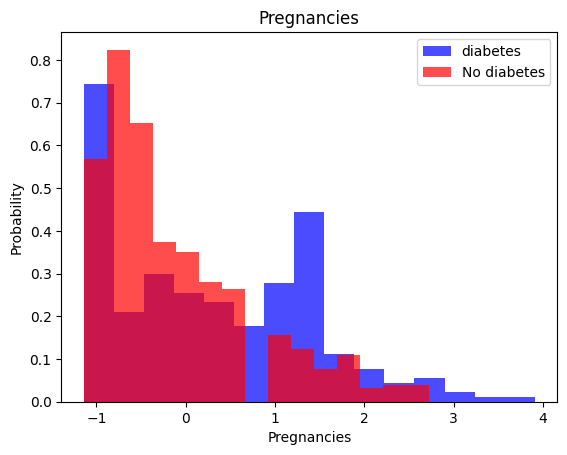

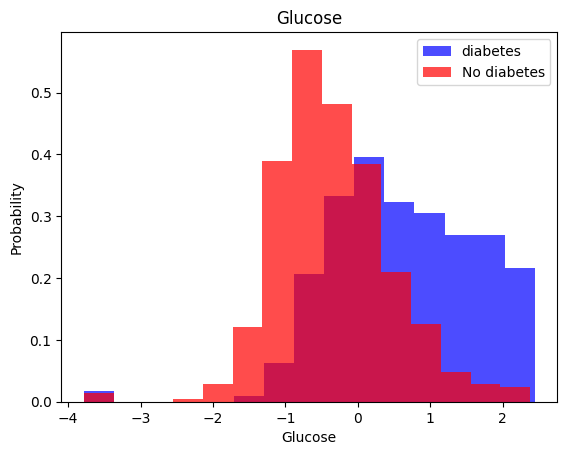

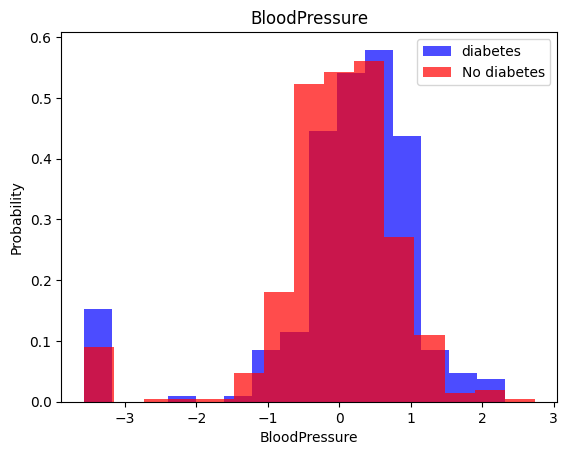

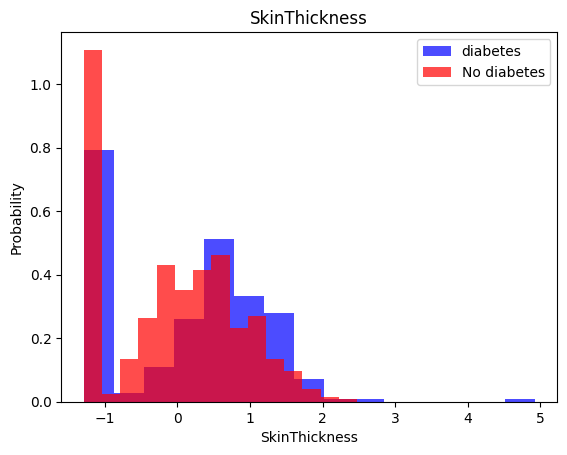

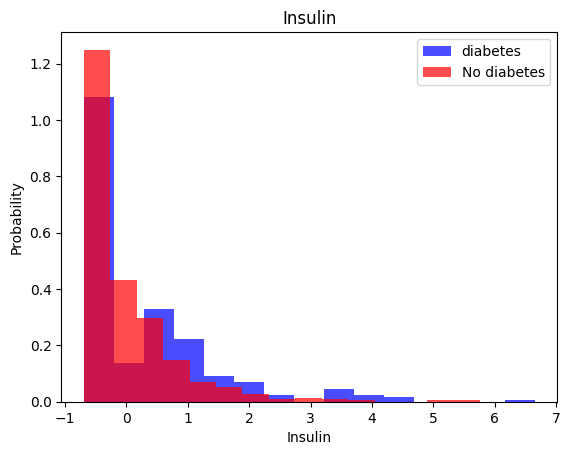

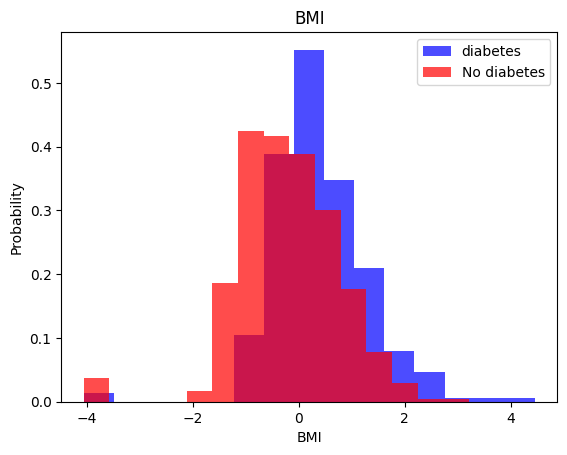

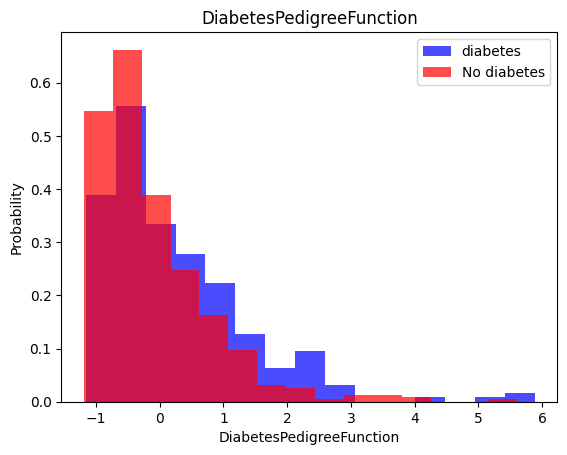

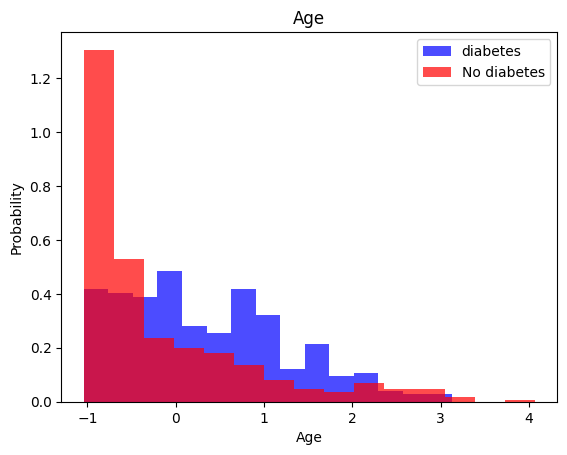

In [11]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label],color="blue",label='diabetes',alpha=0.7,density=True,bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label],color='red',label='No diabetes',alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [12]:
over = RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

In [13]:
x_train,x_temp,y_train,y_temp = train_test_split(X,y, test_size=0.4,random_state=0)
x_valid,x_test,y_valid,y_test = train_test_split(x_temp,y_temp, test_size=0.5,random_state=0)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'), # relu is if x<=0 --> 0, x >0 --> x
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [16]:
model.evaluate(x_train,y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5848 - loss: 0.6693


[0.6748296618461609, 0.6000000238418579]

In [17]:
model.evaluate(x_valid,y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.5545 - loss: 0.7039


[0.6998669505119324, 0.5899999737739563]

In [18]:
model.fit(x_train,y_train,batch_size=16, epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6859 - loss: 0.6121 - val_accuracy: 0.7200 - val_loss: 0.5607
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.7386 - loss: 0.5179 - val_accuracy: 0.7600 - val_loss: 0.4916
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.7660 - loss: 0.4933 - val_accuracy: 0.7550 - val_loss: 0.4585
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7982 - loss: 0.4600 - val_accuracy: 0.7650 - val_loss: 0.4642
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.7895 - loss: 0.4636 - val_accuracy: 0.7700 - val_loss: 0.4705
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.7842 - loss: 0.4342 - val_accuracy: 0.7550 - val_loss: 0.4648
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7956 - loss: 0.4675 - val_accuracy: 0.7500 - val_loss: 0.4795
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.8271 - loss: 0.4268 - val_accuracy: 0.73

In [19]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7875 - loss: 0.4744


[0.5209186673164368, 0.7749999761581421]